In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_city_day = pd.read_csv('city_day.csv')


In [3]:
df_city_day.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [4]:

df_city_day['Date'] = pd.to_datetime(df_city_day['Date'])
df_city_day.set_index('Date', inplace=True)

df_city_day.fillna(method='ffill', inplace=True)

df_cleaned = df_city_day.drop(columns=['City', 'AQI_Bucket'])

df_cleaned.isnull().sum(), df_cleaned.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2408\4216748583.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_city_day.fillna(method='ffill', inplace=True)


(PM2.5        27
 PM10       1594
 NO            0
 NO2           0
 NOx           0
 NH3        2009
 CO            0
 SO2           0
 O3            0
 Benzene       0
 Toluene       0
 Xylene        0
 AQI          28
 dtype: int64,
             PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2      O3  \
 Date                                                                      
 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64  133.36   
 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   34.06   
 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   30.70   
 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   36.08   
 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   39.31   
 
             Benzene  Toluene  Xylene  AQI  
 Date                                       
 2015-01-01     0.00     0.02    0.00  NaN  
 2015-01-02     3.68     5.50    3.77  NaN  
 2015-01-03     6.80    16.40    2.25  NaN  
 2015

In [5]:
df_cleaned.fillna(df_cleaned.median(), inplace=True)

df_cleaned.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,
2015-01-01,46.85,72.38,0.92,18.22,17.15,13.395,0.92,27.64,133.36,0.00,0.02,0.00,113.0
2015-01-02,46.85,72.38,0.97,15.69,16.46,13.395,0.97,24.55,34.06,3.68,5.50,3.77,113.0
2015-01-03,46.85,72.38,17.40,19.30,29.70,13.395,17.40,29.07,30.70,6.80,16.40,2.25,113.0
2015-01-04,46.85,72.38,1.70,18.48,17.97,13.395,1.70,18.59,36.08,4.43,10.14,1.00,113.0
2015-01-05,46.85,72.38,22.10,21.42,37.76,13.395,22.10,39.33,39.31,7.01,18.89,2.78,113.0


In [6]:
df_city_day.isnull().sum()

City             0
PM2.5           27
PM10          1594
NO               0
NO2              0
NOx              0
NH3           2009
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI             28
AQI_Bucket      28
dtype: int64

In [7]:
df_city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29504.000000,27937.000000,29531.000000,29531.000000,29531.000000,27522.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29503.000000
mean,66.130899,95.070437,17.201890,26.909513,32.611069,22.359410,2.292734,15.650236,34.130603,3.130408,7.027591,2.864628,162.865268
std,64.130750,86.577554,23.245966,23.671982,33.829601,26.695912,6.824266,20.583528,21.631257,15.988058,17.841550,5.383474,138.545194
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.160000,31.580000,5.900000,11.630000,13.180000,7.820000,0.500000,5.740000,18.860000,0.050000,0.280000,0.180000,76.000000
50%,46.850000,72.380000,9.280000,19.720000,21.980000,13.395000,0.910000,8.950000,31.480000,0.670000,1.720000,1.250000,113.000000
75%,78.652500,122.290000,18.560000,35.030000,38.660000,25.500000,1.490000,15.840000,44.215000,2.750000,6.710000,2.695000,205.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [8]:
df_cleaned.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,
2015-01-01,46.85,72.38,0.92,18.22,17.15,13.395,0.92,27.64,133.36,0.00,0.02,0.00,113.0
2015-01-02,46.85,72.38,0.97,15.69,16.46,13.395,0.97,24.55,34.06,3.68,5.50,3.77,113.0
2015-01-03,46.85,72.38,17.40,19.30,29.70,13.395,17.40,29.07,30.70,6.80,16.40,2.25,113.0
2015-01-04,46.85,72.38,1.70,18.48,17.97,13.395,1.70,18.59,36.08,4.43,10.14,1.00,113.0
2015-01-05,46.85,72.38,22.10,21.42,37.76,13.395,22.10,39.33,39.31,7.01,18.89,2.78,113.0


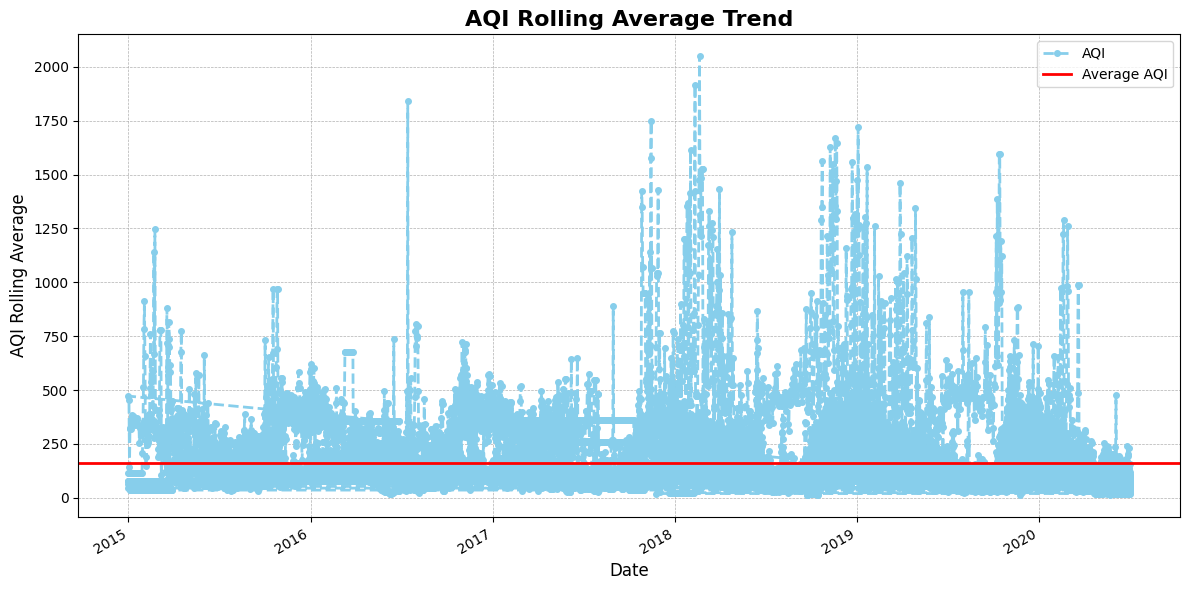

In [9]:
plt.figure(figsize=(12, 6))
df_cleaned['AQI'].plot(color='skyblue', linewidth=2, linestyle='--', marker='o', markersize=4)
plt.title('AQI Rolling Average Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI Rolling Average', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.axhline(y=df_cleaned['AQI'].mean(), color='red', linestyle='-', linewidth=2, label='Average AQI')
plt.legend()
plt.tight_layout()
plt.show()


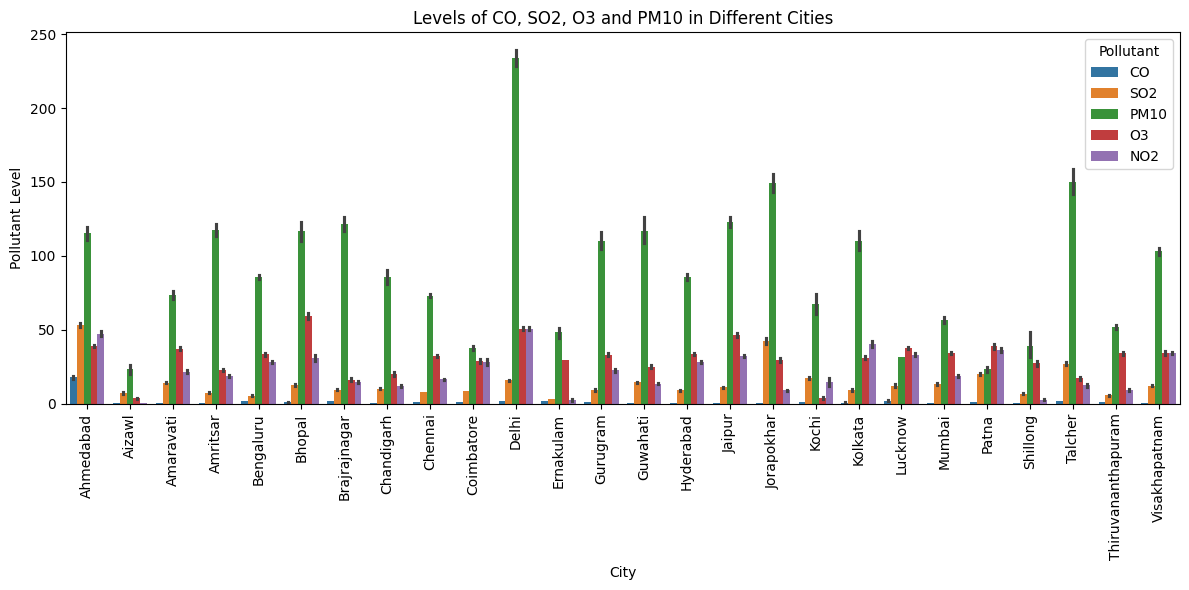

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_melted = df_city_day.melt(id_vars='City', value_vars=['CO', 'SO2', 'PM10', 'O3', 'NO2'], 
                    var_name='Pollutant', value_name='Level')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='City', y='Level', hue='Pollutant')

plt.title('Levels of CO, SO2, O3 and PM10 in Different Cities')
plt.xlabel('City')
plt.ylabel('Pollutant Level')
plt.legend(title='Pollutant')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


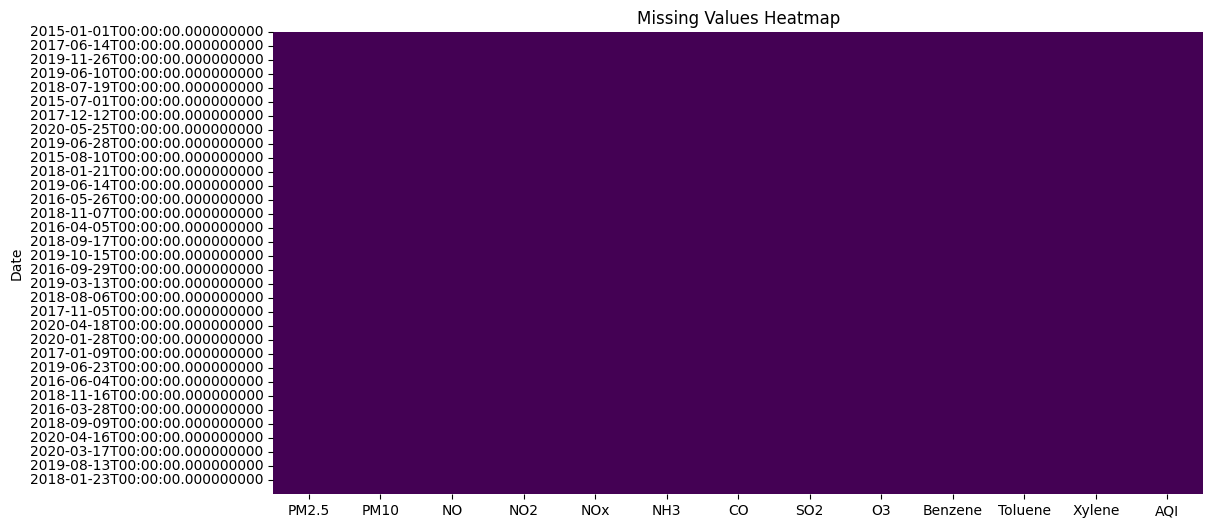

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


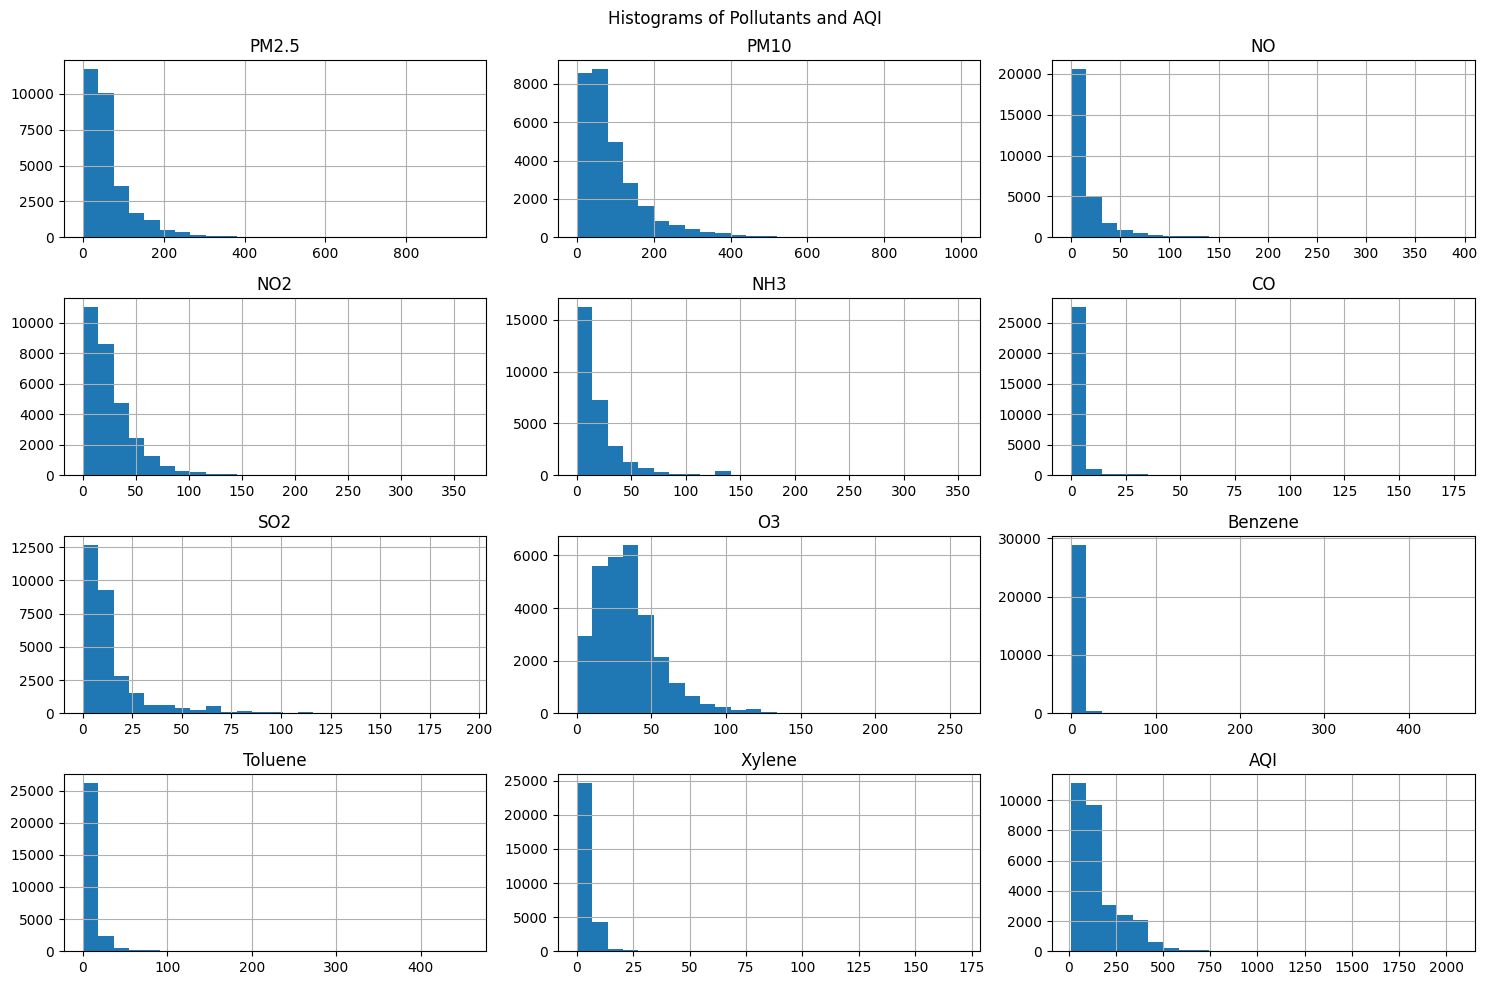

In [12]:
df_cleaned[['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']].hist(bins=25, figsize=(15, 10))
plt.suptitle('Histograms of Pollutants and AQI')
plt.tight_layout()
plt.show()


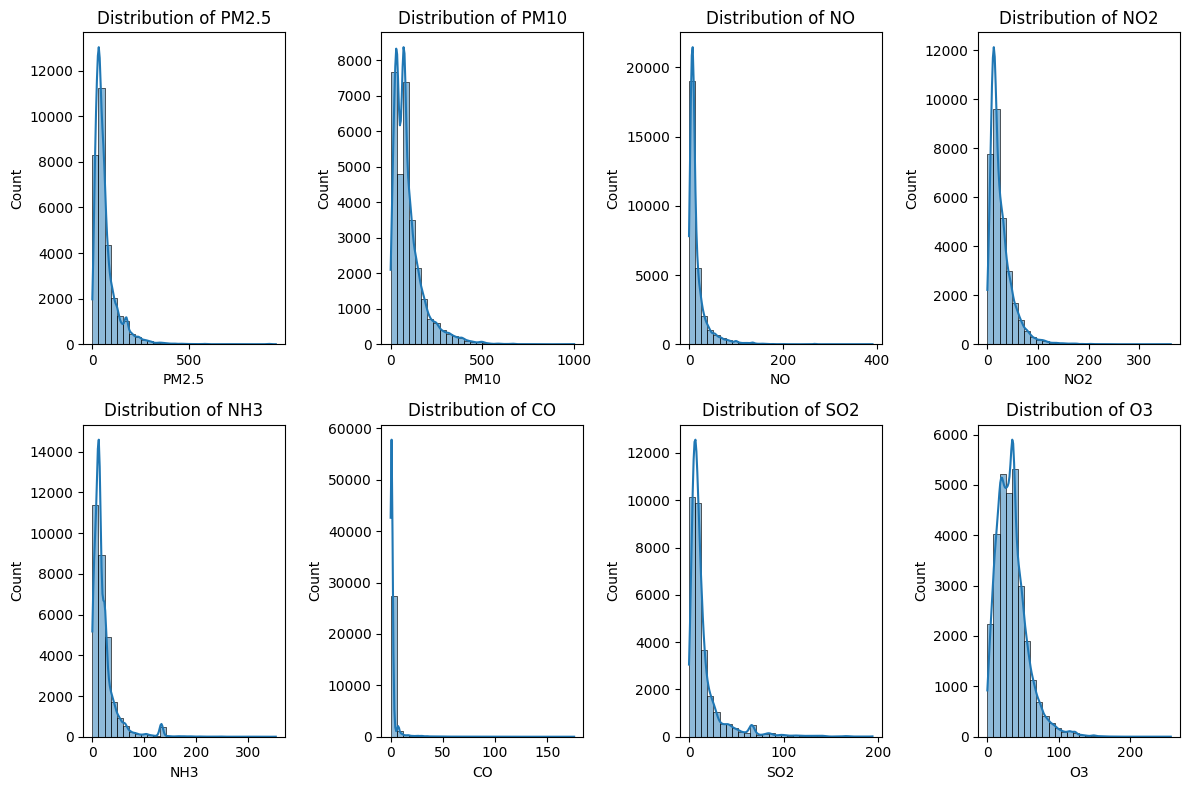

In [13]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3']
plt.figure(figsize=(12, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df_cleaned[pollutant], bins=30, kde=True)
    plt.title(f'Distribution of {pollutant}')
plt.tight_layout()
plt.show()


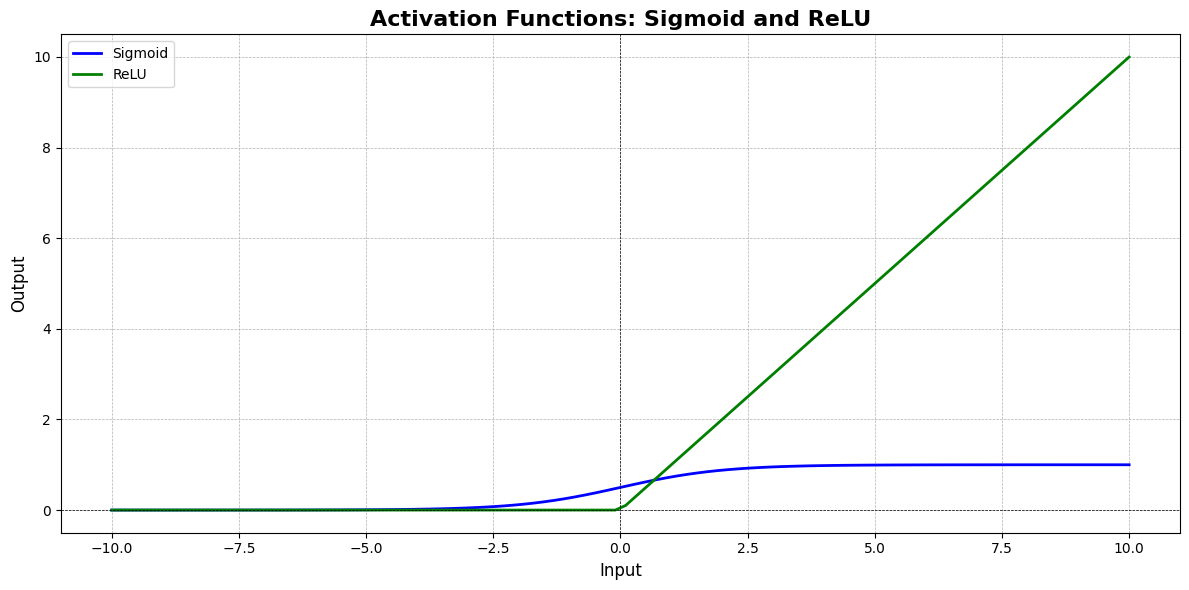

In [14]:
import numpy as np

# Generate a range of input values
x = np.linspace(-10, 10, 100)

# Sigmoid function
sigmoid = 1 / (1 + np.exp(-x))

# ReLU function
relu = np.maximum(0, x)

plt.figure(figsize=(12, 6))
plt.plot(x, sigmoid, label='Sigmoid', color='blue', linewidth=2)
plt.plot(x, relu, label='ReLU', color='green', linewidth=2)

# Add titles and labels
plt.title('Activation Functions: Sigmoid and ReLU', fontsize=16, fontweight='bold')
plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
